В этом ноутбуке создаются все графики и проводится вся аналитика. Все самые важные графики сохраненны в папке ```model/eda/graphs```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('C:\develop\Fishing_team\data\processed_data.csv')

C:\Users\BeesKnight\AppData\Local\Temp\ipykernel_26712\782650066.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_spend.index, y=daily_spend.values, palette='viridis')


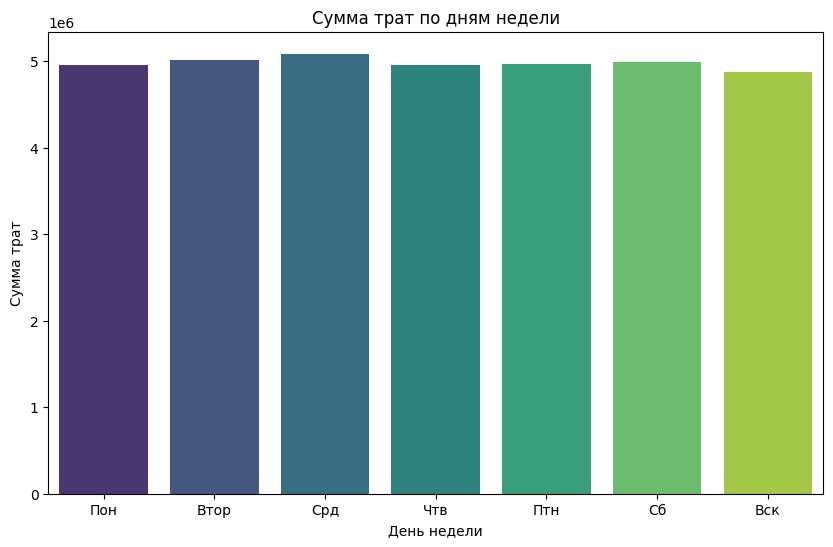

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['day_of_week'] = df['datetime'].dt.dayofweek

daily_spend = df.groupby('day_of_week')['sum'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_spend.index, y=daily_spend.values, palette='viridis')
plt.title("Сумма трат по дням недели")
plt.xlabel("День недели")
plt.ylabel("Сумма трат")
plt.xticks(ticks=np.arange(7), labels=['Пон', 'Втор', 'Срд', 'Чтв', 'Птн', 'Сб', 'Вск'])
plt.show()


C:\Users\BeesKnight\AppData\Local\Temp\ipykernel_26712\887553661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_spend.index, y=hourly_spend.values, palette='magma')


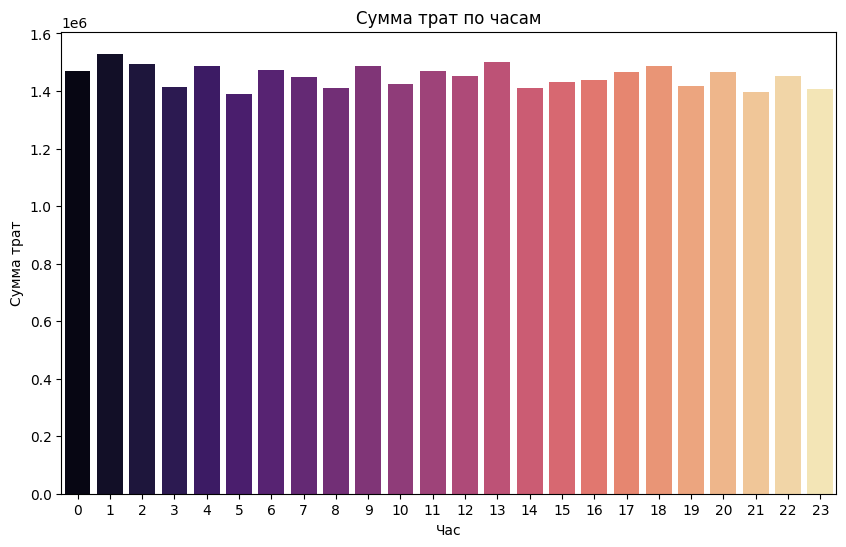

In [5]:
df['hour'] = df['datetime'].dt.hour

hourly_spend = df.groupby('hour')['sum'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_spend.index, y=hourly_spend.values, palette='magma')
plt.title("Сумма трат по часам")
plt.xlabel("Час")
plt.ylabel("Сумма трат")
plt.xticks(ticks=np.arange(0, 24, 1))
plt.show()


In [6]:
numeric_columns = ['sum', 'pin_inc_count', 'balance', 'device_id']  # И другие числовые столбцы
stats = df[numeric_columns].describe()

print(stats)


                sum  pin_inc_count        balance     device_id
count  53079.000000   53079.000000   53079.000000  53079.000000
mean     656.057842       0.147441  523149.367494    753.008026
std      320.938640       0.404768  272586.082820    425.396994
min      101.730000       0.000000       0.000000     10.000000
25%      377.960000       0.000000  288596.000000    384.000000
50%      660.080000       0.000000  526677.780000    739.000000
75%      934.975000       0.000000  762799.035000   1120.000000
max     1199.270000       3.000000  999769.830000   1495.000000


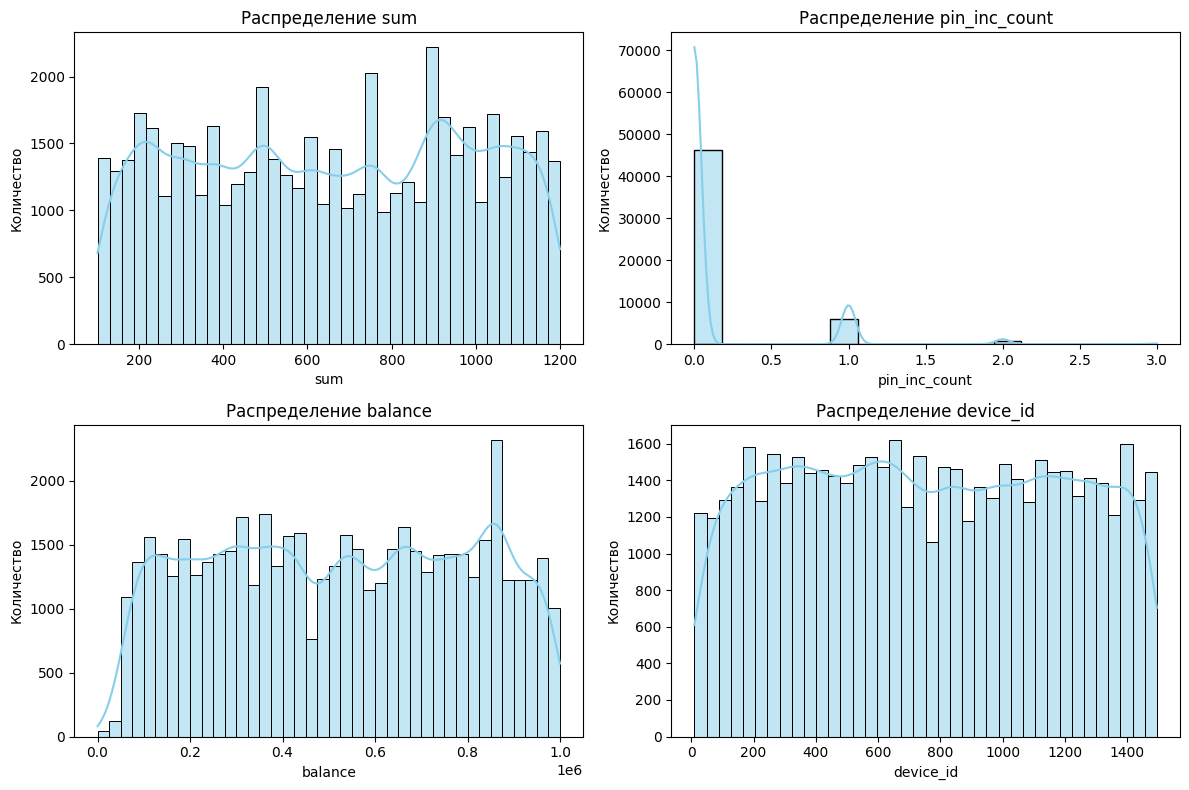

In [7]:
# Гистограммы для основных метрик
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Распределение {col}')
    plt.ylabel("Количество")
plt.tight_layout()
plt.show()


C:\Users\BeesKnight\AppData\Local\Temp\ipykernel_26712\4146531183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_spend.index, y=device_spend.values, palette='coolwarm')


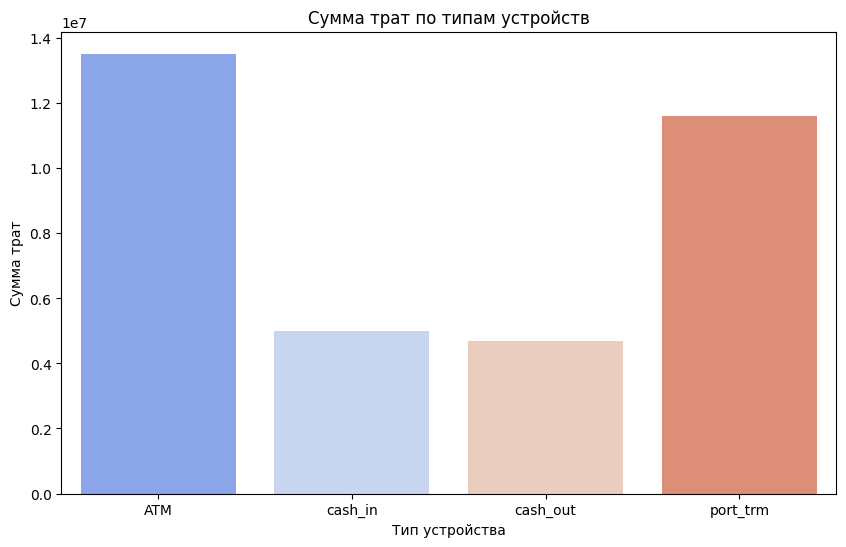

C:\Users\BeesKnight\AppData\Local\Temp\ipykernel_26712\4146531183.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=card_type_spend.index, y=card_type_spend.values, palette='crest')


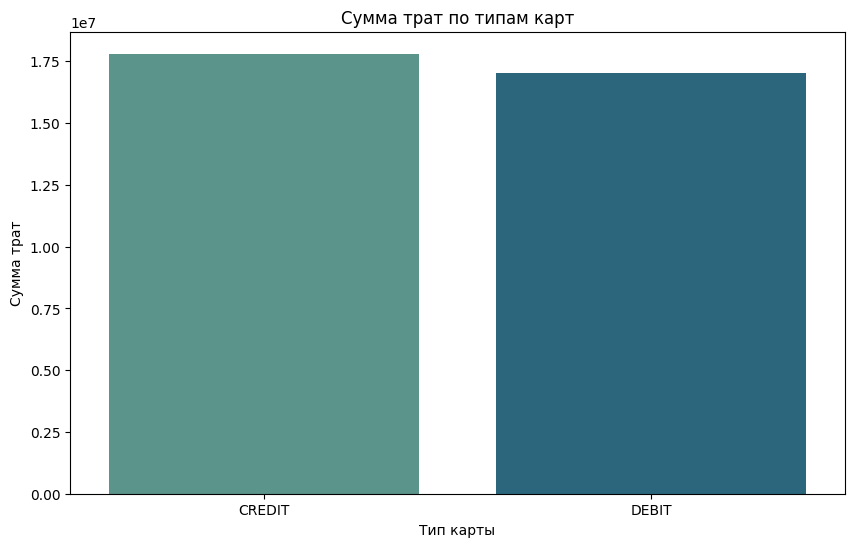

In [8]:
# Сумма трат по устройствам
device_spend = df.groupby('device_type')['sum'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=device_spend.index, y=device_spend.values, palette='coolwarm')
plt.title("Сумма трат по типам устройств")
plt.xlabel("Тип устройства")
plt.ylabel("Сумма трат")
plt.show()

# Сумма трат по типам карт
card_type_spend = df.groupby('card_type')['sum'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=card_type_spend.index, y=card_type_spend.values, palette='crest')
plt.title("Сумма трат по типам карт")
plt.xlabel("Тип карты")
plt.ylabel("Сумма трат")
plt.show()


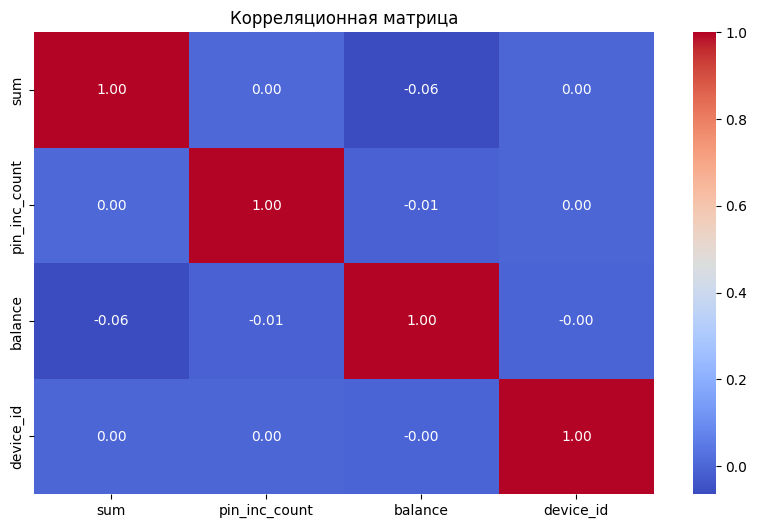

In [9]:
# Корреляционная матрица
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


C:\Users\BeesKnight\AppData\Local\Temp\ipykernel_26712\3433477717.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tran_code_spend.index, y=tran_code_spend.values, palette='plasma')


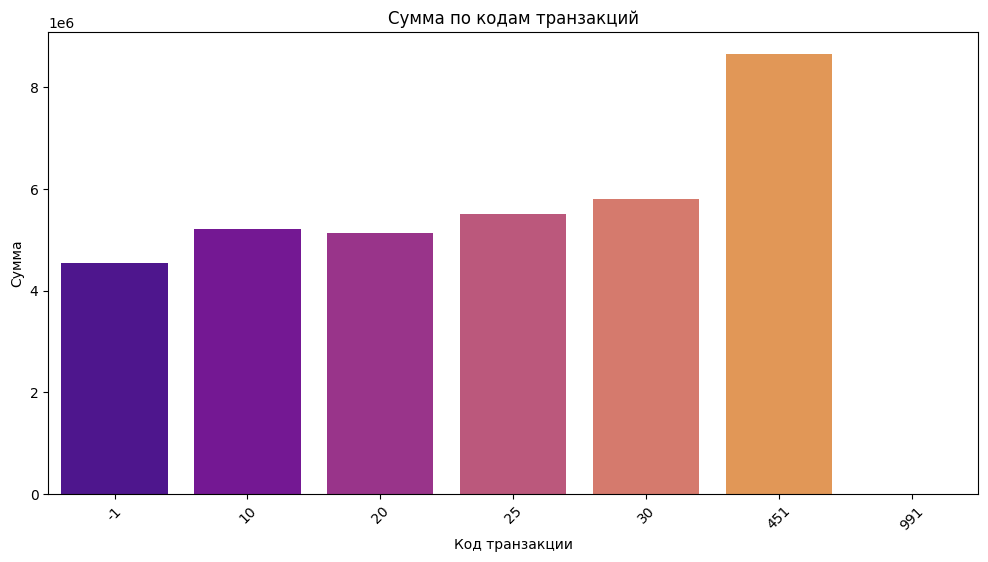

In [10]:
# Сумма трат по кодам транзакций
tran_code_spend = df.groupby('tran_code')['sum'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=tran_code_spend.index, y=tran_code_spend.values, palette='plasma')
plt.title("Сумма по кодам транзакций")
plt.xlabel("Код транзакции")
plt.ylabel("Сумма")
plt.xticks(rotation=45)
plt.show()


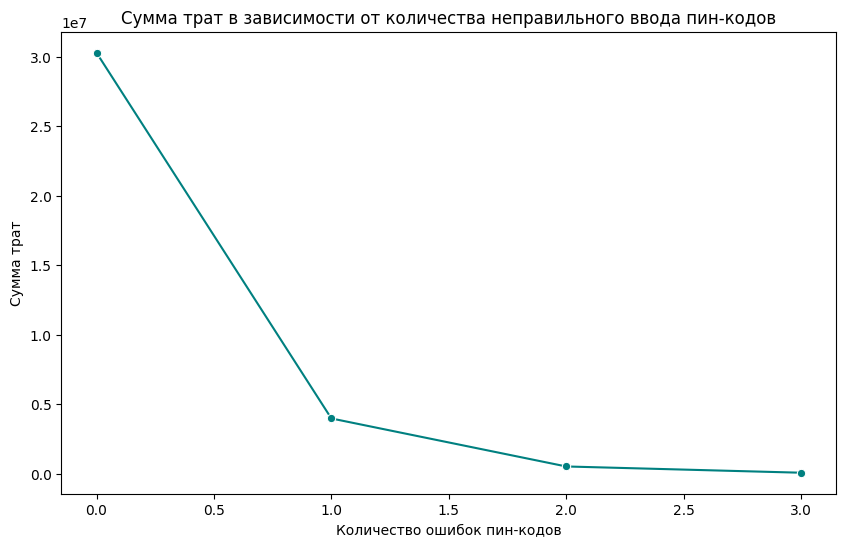

In [11]:
# Анализ суммы по количеству ошибок при вводе пин-кодов
pin_inc_spend = df.groupby('pin_inc_count')['sum'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=pin_inc_spend.index, y=pin_inc_spend.values, marker='o', color='teal')
plt.title("Сумма трат в зависимости от количества неправильного ввода пин-кодов")
plt.xlabel("Количество ошибок пин-кодов")
plt.ylabel("Сумма трат")
plt.show()


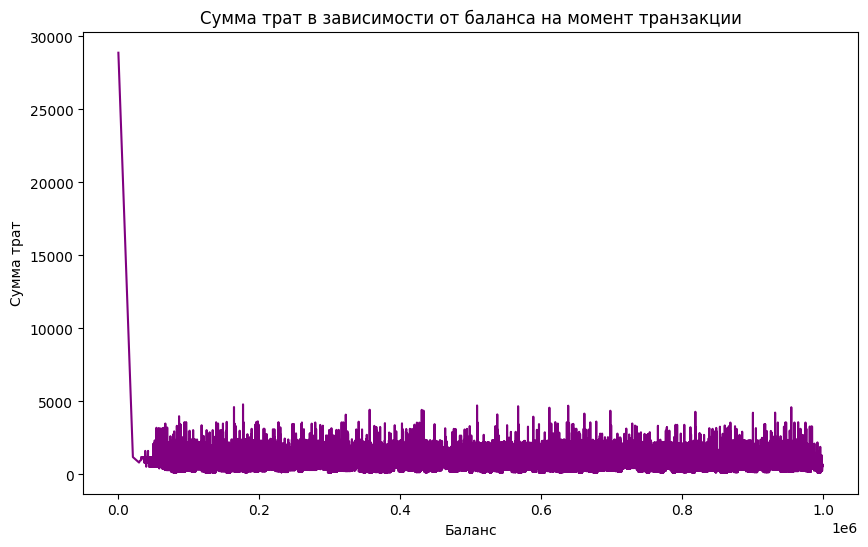

In [12]:
# Сумма по балансу
balance_spend = df.groupby('balance')['sum'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=balance_spend.index, y=balance_spend.values, color='purple')
plt.title("Сумма трат в зависимости от баланса на момент транзакции")
plt.xlabel("Баланс")
plt.ylabel("Сумма трат")
plt.show()


C:\Users\BeesKnight\AppData\Local\Temp\ipykernel_26712\2033885503.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_clients.index, y=top_10_clients.values, palette='coolwarm')


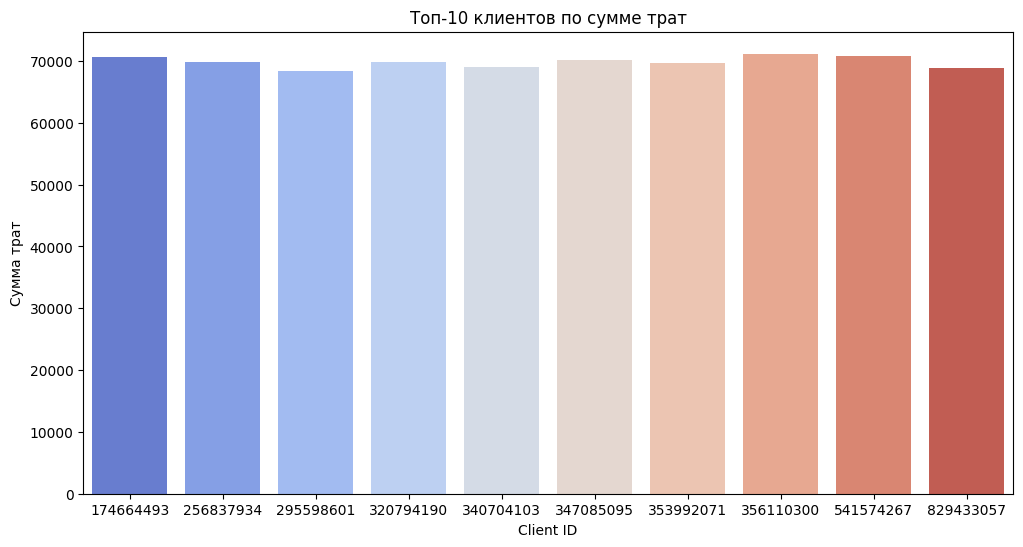

In [13]:
# топ 10 клиентов по сумме трат
client_spend = df.groupby('client_id')['sum'].sum().sort_values(ascending=False)

top_10_clients = client_spend.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_clients.index, y=top_10_clients.values, palette='coolwarm')
plt.title("Топ-10 клиентов по сумме трат")
plt.xlabel("Client ID")
plt.ylabel("Сумма трат")
plt.show()


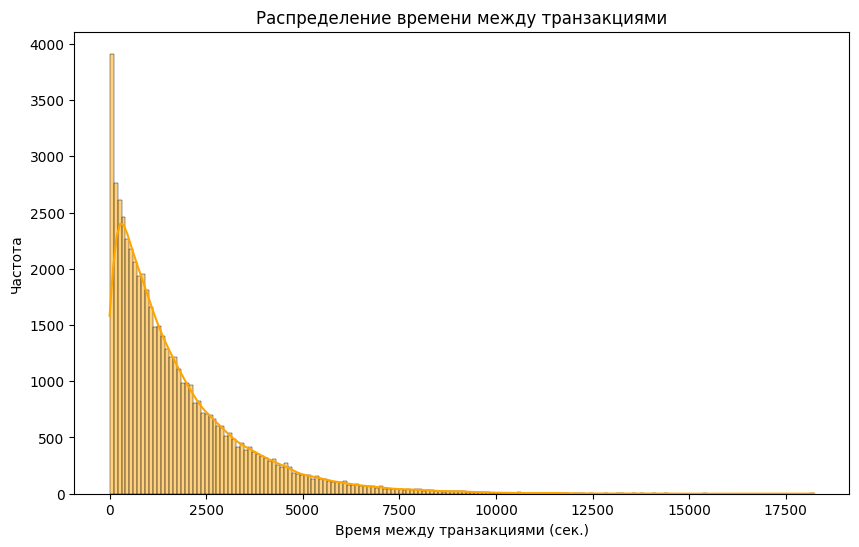

In [14]:
# Вычисляем разницу между последовательными транзакциями
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')

df['time_diff'] = df['datetime'].diff().fillna(pd.Timedelta(0))

plt.figure(figsize=(10, 6))
sns.histplot(df['time_diff'].dt.total_seconds(), kde=True, color='orange')
plt.title("Распределение времени между транзакциями")
plt.xlabel("Время между транзакциями (сек.)")
plt.ylabel("Частота")
plt.show()


Среднее количество транзакций на пользователя: 53.079


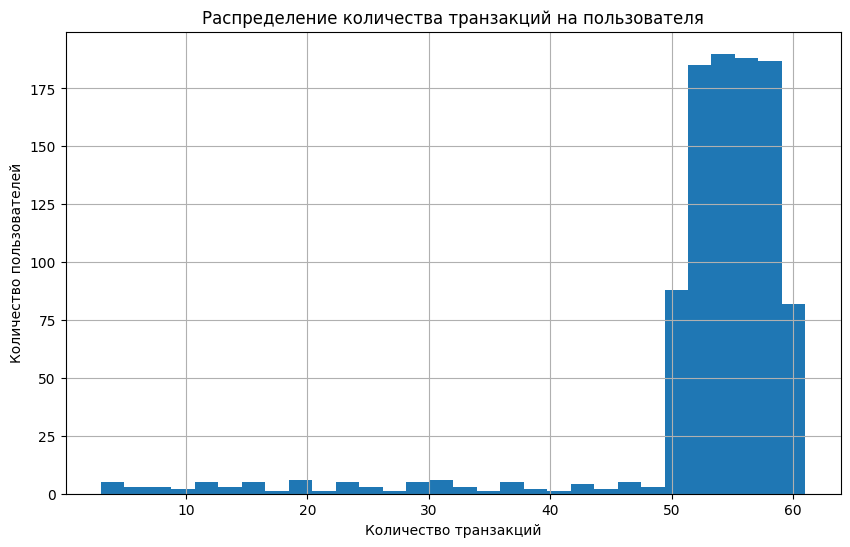

In [20]:
transaction_counts = df.groupby('client_id').size()
avg_transactions_per_user = transaction_counts.mean()
print(f'Среднее количество транзакций на пользователя: {avg_transactions_per_user}')

plt.figure(figsize=(10, 6))
transaction_counts.hist(bins=30)
plt.title('Распределение количества транзакций на пользователя')
plt.xlabel('Количество транзакций')
plt.ylabel('Количество пользователей')
plt.show()

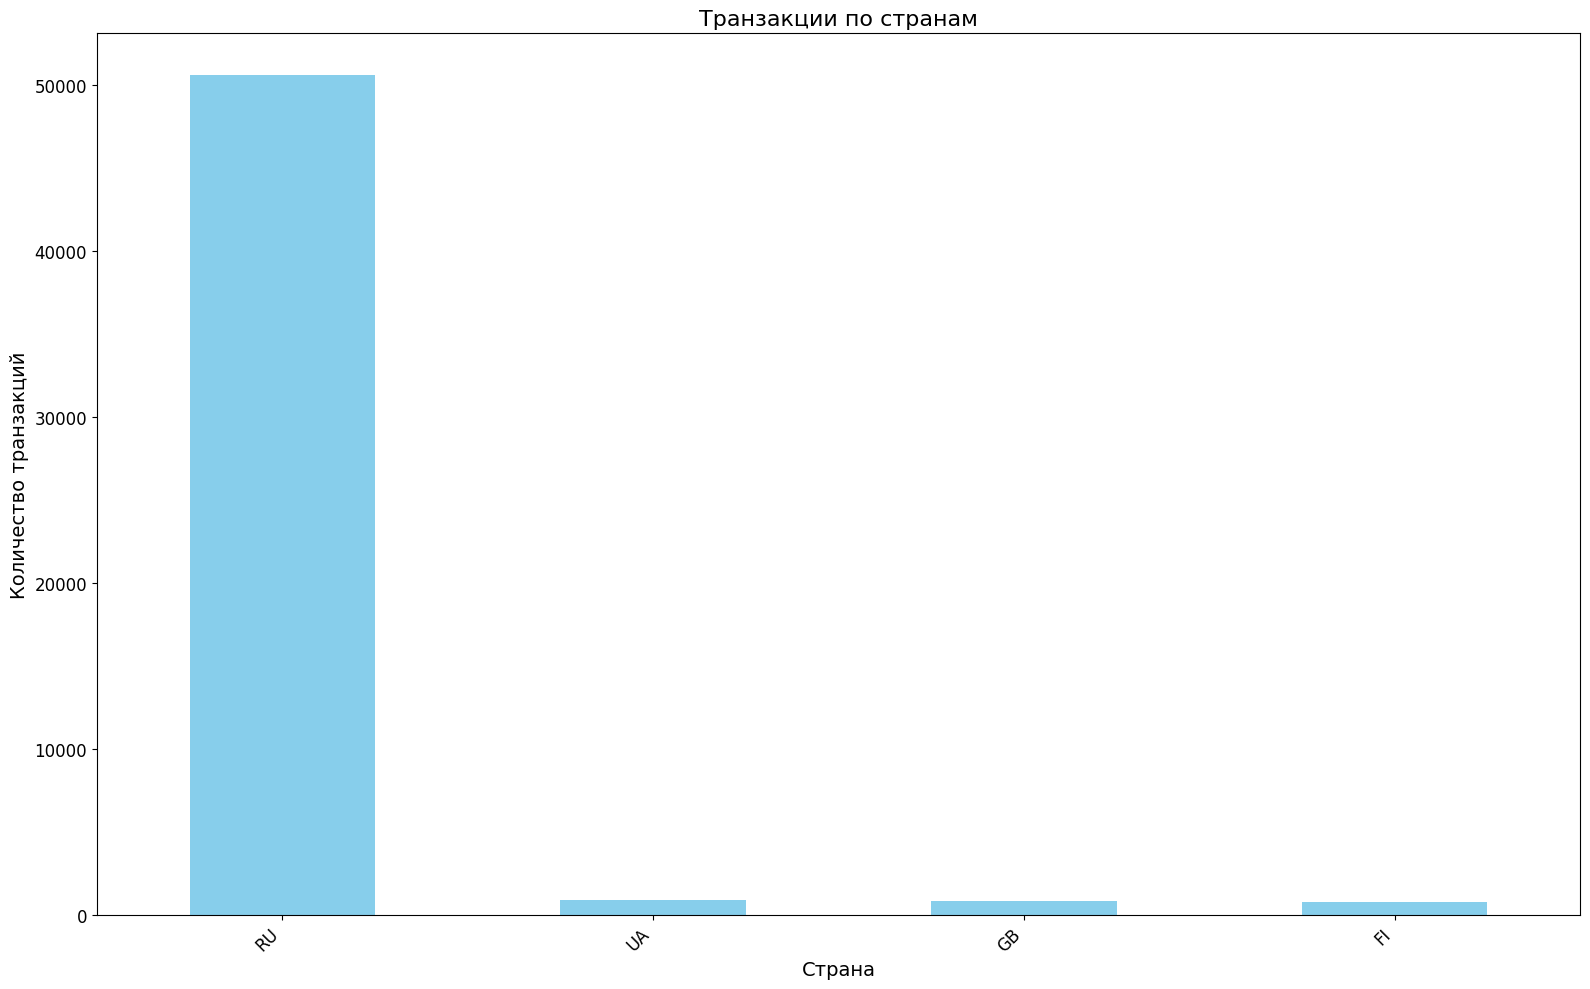

In [ ]:
import requests

# Ваш API-ключ
api_key = 'd0ab7e32128ef1'

def get_location_by_ip(ip_address, api_key):
    url = f"https://ipinfo.io/{ip_address}/json?token={api_key}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        return data.get('country', 'Unknown')
    else:
        return "Unknown"

# Оставляем только уникальные IP-адреса
unique_ips = df['ip'].unique()

ip_to_country = {ip: get_location_by_ip(ip, api_key) for ip in unique_ips}

df['country'] = df['ip'].apply(lambda ip: ip_to_country.get(ip, "Unknown"))

country_transaction_count = df['country'].value_counts().head(20)

plt.figure(figsize=(16, 10)) 
country_transaction_count.plot(kind='bar', color='skyblue')
plt.title('Транзакции по странам', fontsize=16)
plt.xlabel('Страна', fontsize=14)
plt.ylabel('Количество транзакций', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  
plt.tight_layout() 
plt.show()
